In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


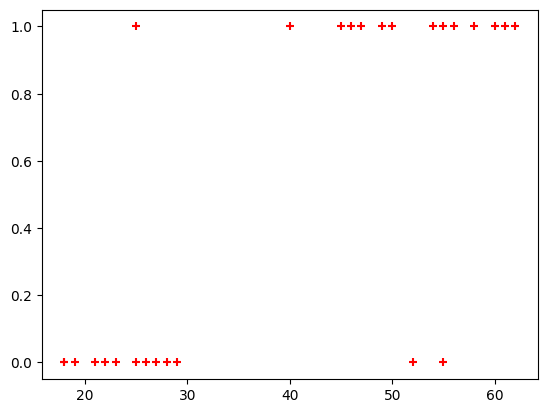

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.1)

In [ ]:
x_test

,age
12,27
15,55
21,26


In [ ]:
x_train

,age
18,19
7,60
9,61
8,62
6,55
13,29
2,47
26,23
25,54
10,18


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.predict(x_test)

array([0, 1, 0])

In [ ]:
model.score(x_test,y_test)

1.0

In [ ]:
model.predict_proba(x_test)

array([[0.79918307, 0.20081693],
       [0.11006596, 0.88993404],
       [0.81834431, 0.18165569]])

In [ ]:
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
left=df[df.left==1]
left.shape

(3571, 10)

In [ ]:
retained=df[df.left==0]
retained.shape

(11428, 10)

**Average numbers for all columns**

In [ ]:
df.groupby('left').mean()

<ipython-input-47-b0959f325c8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Satisfaction Level: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

Average Monthly Hours: Average monthly hours are higher in employees leaving the firm (199 vs 207)

Promotion Last 5 Years: Employees who are given promotion are likely to be retained at firm

**Impact of salary on employee retention**

<Axes: xlabel='salary', ylabel='count'>

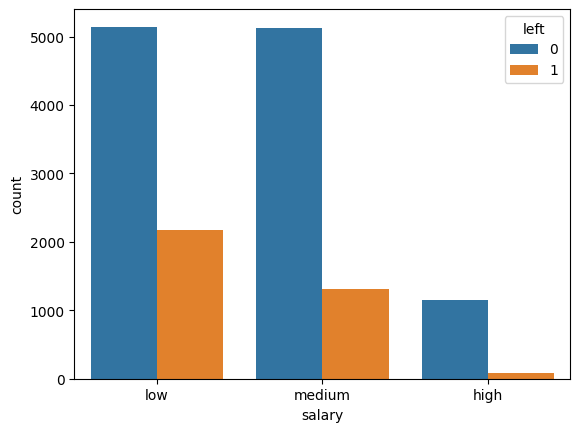

In [ ]:
sns.countplot(x='salary',data=df,hue='left')

Above bar chart shows employees with high salaries are likely to not leave the company

**Department wise employee retention rate**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

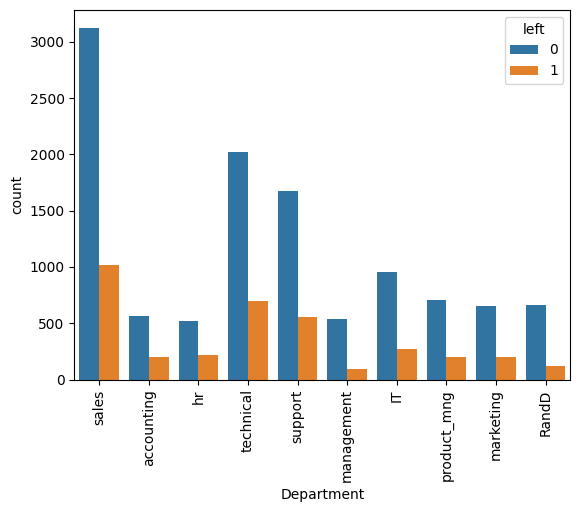

In [ ]:
sns.countplot(x='Department',data=df,hue='left')
plt.xticks(rotation=90)

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

### From the data analysis so far we can conclude that we will use following variables as independant variables in our model
**1.Satisfaction Level**

**2.Average Monthly Hours**

**3.Promotion Last 5 Years**

**4.Salary**

In [ ]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**Note:** salary has all text data.It needs to be converted to numbers and we will use dummy variable for that.

In [ ]:
salary_dummies=pd.get_dummies(subdf.salary,prefix='salary')

In [ ]:
final_subdf=pd.concat([subdf,salary_dummies],axis='columns')

In [ ]:
final_subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [ ]:
final_subdf.drop('salary',axis='columns',inplace=True)
final_subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
X = final_subdf
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
y = df.left

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

Accuracy of the model

In [ ]:
model.score(X_test,y_test)

0.7906666666666666

**Logistic Regression: Multiclass Classification**

In [38]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits() 

<Figure size 640x480 with 0 Axes>

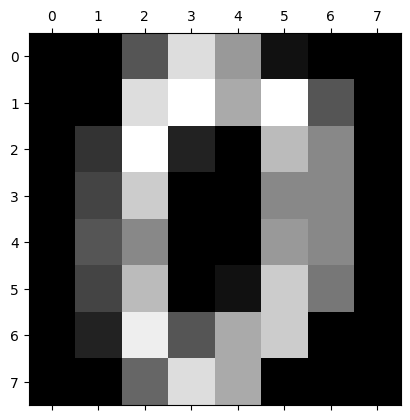

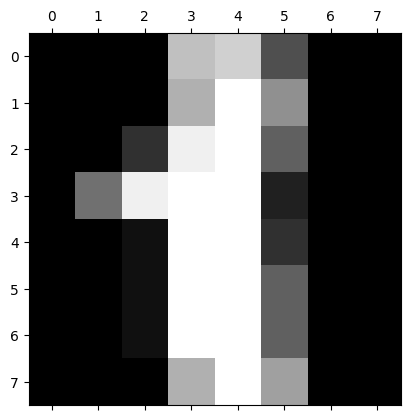

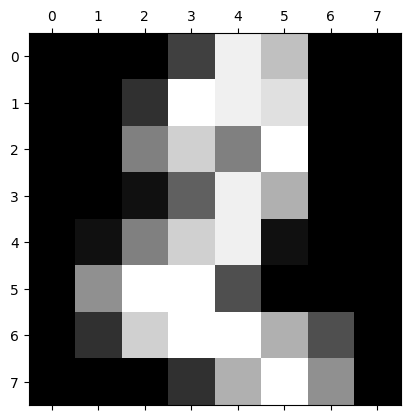

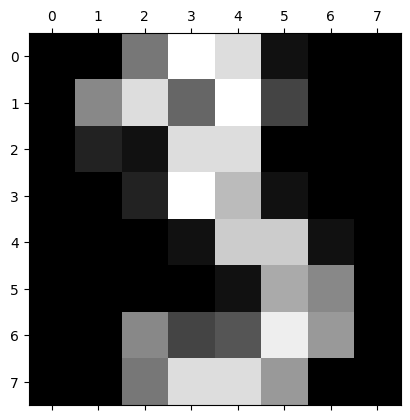

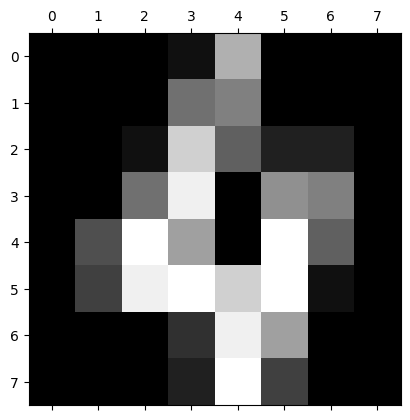

In [39]:
 plt.gray() 
 for i in range(5):
    plt.matshow(digits.images[i])

In [15]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [16]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [34]:
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
model.score(X_test, y_test)

0.9666666666666667

In [52]:
len(digits.data)

1797

In [55]:
digits.data[1700]

array([ 0.,  0.,  4.,  9., 12., 16.,  8.,  0.,  0.,  0., 15., 15.,  8.,
        8.,  2.,  0.,  0.,  4., 16., 11.,  4.,  1.,  0.,  0.,  0.,  8.,
       16., 16., 16., 14.,  0.,  0.,  0.,  0., 11.,  9.,  8., 16.,  0.,
        0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0.,  8.,
       16., 12.,  0.,  0.,  0.,  0.,  3., 13.,  9.,  1.,  0.,  0.])

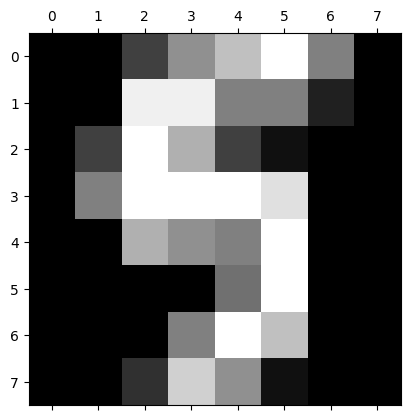

In [53]:
 plt.matshow(digits.images[1700])

In [54]:
model.predict([digits.data[1700]])

array([5])

## Confusion Matrix

In [46]:
y_predicted = model.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[46,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 24,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 43,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  1, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  1],
       [ 1,  0,  0,  0,  0,  1,  0,  0, 27,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 36]])

Text(50.722222222222214, 0.5, 'Truth')

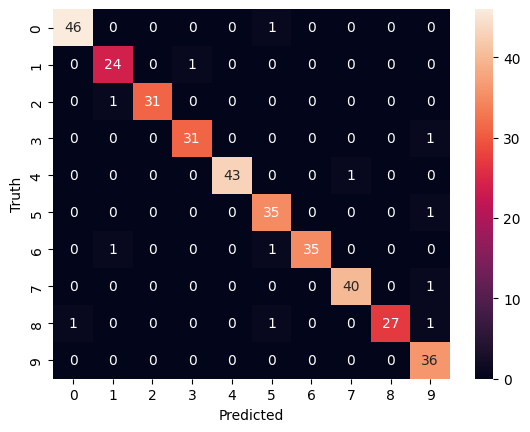

In [48]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Iris data classification

In [56]:
import pandas as pd # for importing dataset
import numpy as np#deal with array
import matplotlib.pyplot as plt # data visualization 
import seaborn as sns #data visualization library based on matplotlib
from sklearn.linear_model import LogisticRegression #model

In [60]:
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


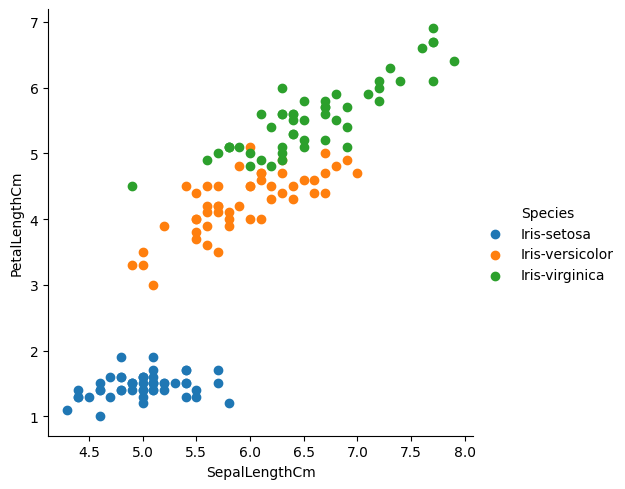

In [63]:
sns.FacetGrid(df,hue="Species",height=5).map(plt.scatter,"SepalLengthCm","PetalLengthCm").add_legend()


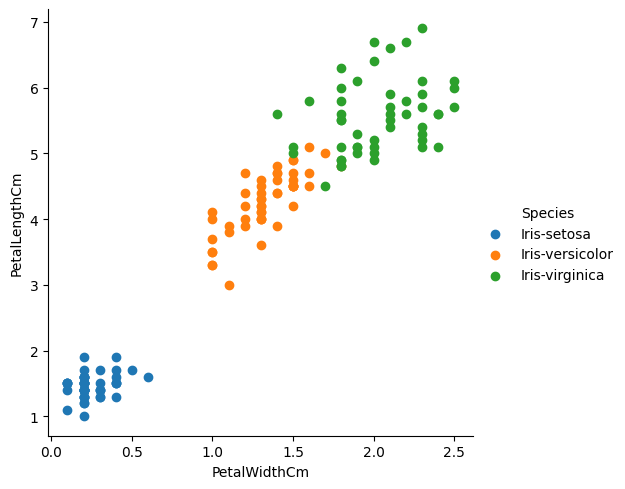

In [64]:
sns.FacetGrid(df,hue="Species",height=5).map(plt.scatter,'PetalWidthCm',"PetalLengthCm").add_legend()


In [66]:
x=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y=df[['Species']]

In [67]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [87]:
Model =  LogisticRegression()
Model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
Model.score(x_test,y_test)

0.98

In [89]:
Model.predict(x_test)

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)